In [ ]:
!pip install pycaret

: 

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *

In [133]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv',index_col = 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# EDA

In [134]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [135]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [137]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
# def outliers(col):
#     per25 = df[col].quantile(0.25)
#     per75 = df[col].quantile(0.75)
#     IQR = per75 - per25               #Inter Quartile Range 
#     UL = per75 + 1.5 * IQR            #Upper Limit
#     LL = per25 - 1.5 * IQR            #Lower Limit
#     print("IQR - ",IQR)
#     print("Upper Limit & Lower Limit - ",UL,LL)
#     print(df[df[col]>UL],'\n',df[df[col]<LL])

In [139]:
df['flower'] = df['Species'].map({'Iris-setosa':1,
                                 'Iris-versicolor':2,
                                 'Iris-virginica':3})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


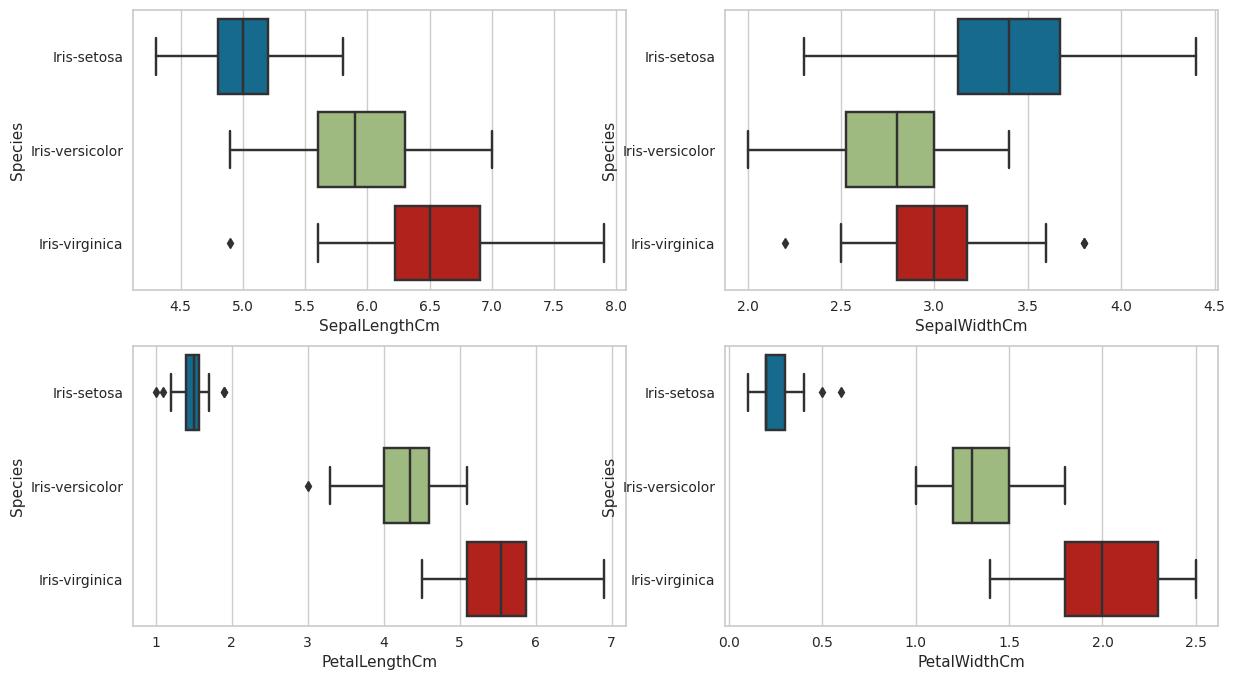

In [140]:
plt.figure(figsize = (14,8))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df, y = 'Species', x = z,orient = 'h')
plt.show()

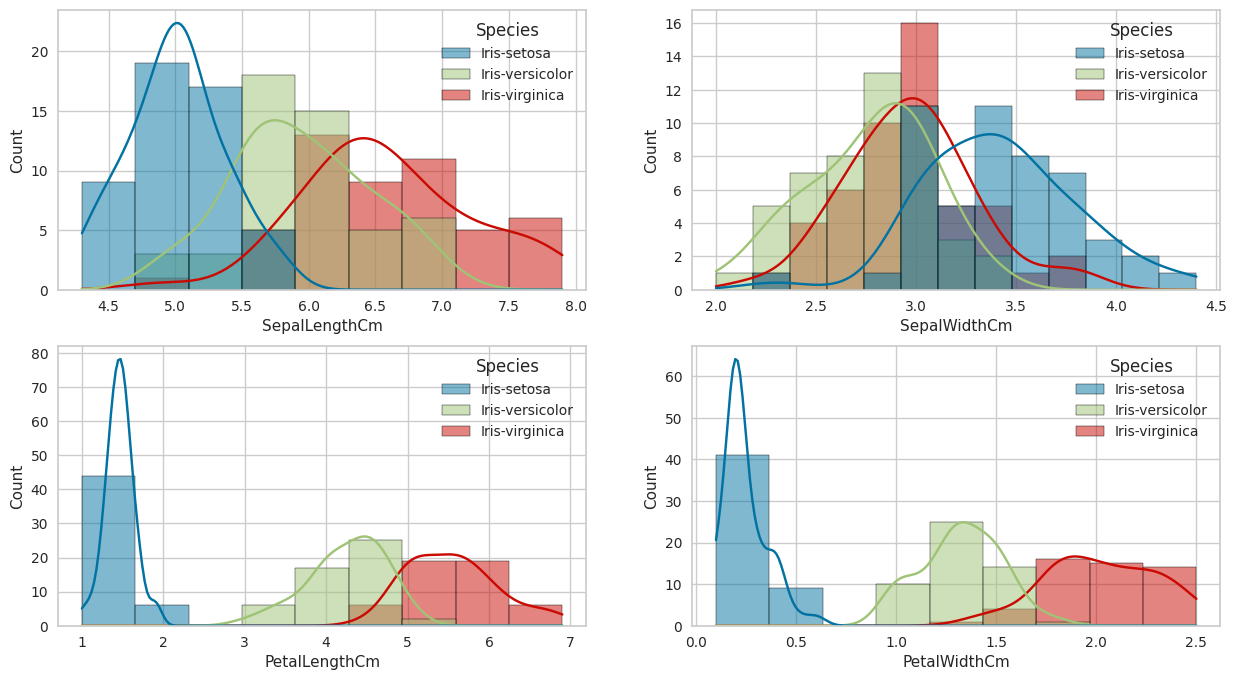

In [141]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Species')
plt.show()

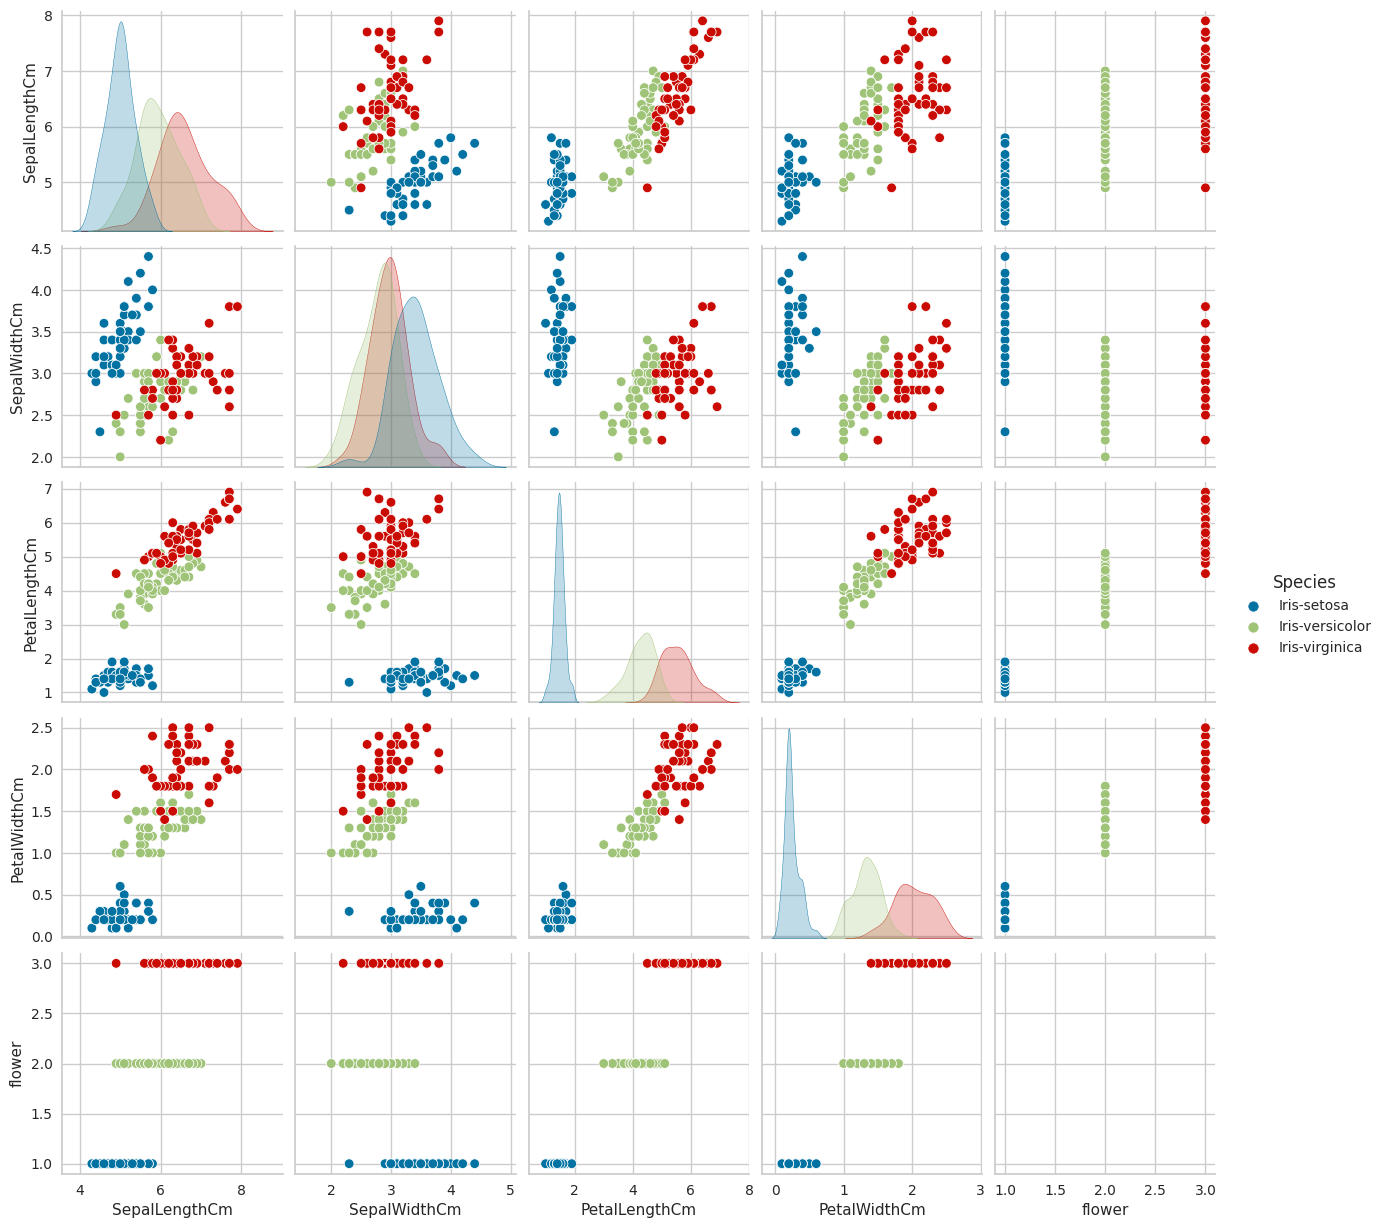

In [142]:
sns.pairplot(data = df , hue = 'Species')

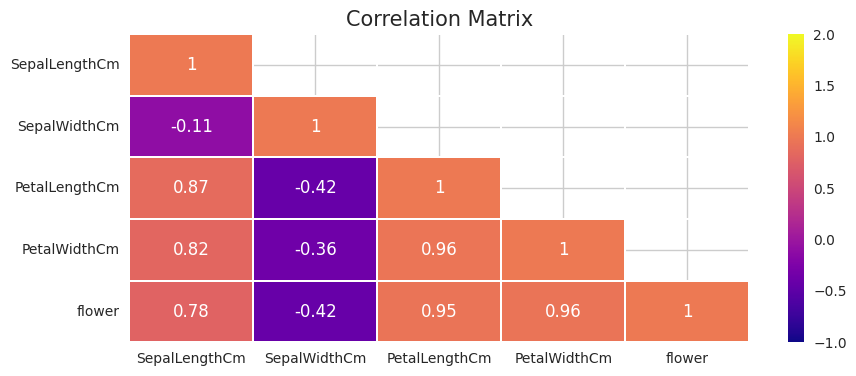

In [143]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

# Model Building

In [144]:
Y = df['flower']
X = df.drop(['Species','flower'],axis = 1)

In [145]:
# Pycaret Classification
setup(data=X,target=Y)
best_model=compare_models()

,Description,Value
0,Session id,6684
1,Target,flower
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9818,0.9976,0.9766,0.9825,0.9766,0.9728,0.9750,0.0190
lda,Linear Discriminant Analysis,0.9818,0.9976,0.9766,0.9825,0.9766,0.9728,0.9750,0.0170
lr,Logistic Regression,0.9727,0.9976,0.9623,0.9710,0.9617,0.9589,0.9622,0.4640
ada,Ada Boost Classifier,0.9727,0.9963,0.9623,0.9710,0.9617,0.9589,0.9622,0.0690
gbc,Gradient Boosting Classifier,0.9718,0.9911,0.9623,0.9710,0.9617,0.9576,0.9611,0.1420
lightgbm,Light Gradient Boosting Machine,0.9718,0.9899,0.9623,0.9718,0.9623,0.9579,0.9614,0.1900
knn,K Neighbors Classifier,0.9636,0.9951,0.9481,0.9539,0.9481,0.9453,0.9475,0.0280
dt,Decision Tree Classifier,0.9627,0.9723,0.9481,0.9596,0.9468,0.9436,0.9483,0.0170
et,Extra Trees Classifier,0.9627,0.9951,0.9481,0.9603,0.9474,0.9440,0.9486,0.1130
catboost,CatBoost Classifier,0.9627,0.9951,0.9481,0.9603,0.9474,0.9440,0.9486,1.1640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [146]:
Knn = create_model('knn')
bagged_knn = ensemble_model(Knn, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,0.9878,0.8571,0.8929,0.8571,0.8642,0.8750
2,0.8182,0.9635,0.7143,0.7143,0.7143,0.7250,0.7250
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,0.9756,0.8571,0.8929,0.8571,0.8642,0.8750
2,0.8182,0.9756,0.7143,0.7143,0.7143,0.7250,0.7250
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9000,1.0000,0.8571,0.8929,0.8571,0.8507,0.8636


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

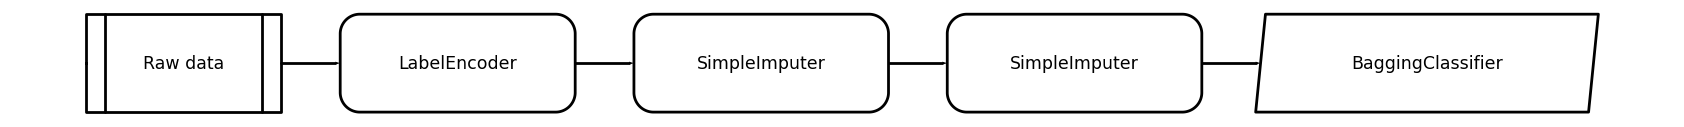

In [155]:
evaluate_model(bagged_knn)

In [148]:
tuned_knn = tune_model(bagged_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,1.0000,0.8571,0.8929,0.8571,0.8642,0.8750
2,0.9091,0.9756,0.8571,0.8857,0.8508,0.8608,0.8721
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


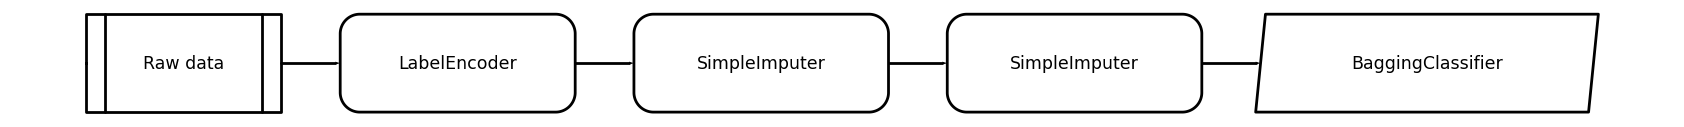

In [154]:
evaluate_model(tuned_knn)

In [150]:
predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9556,0.9956,0.9556,0.9556,0.9556,0.9333,0.9333


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,flower,prediction_label,prediction_score
Id,,,,,,,
2,4.9,3.0,1.4,0.2,0,1,1.00
24,5.1,3.3,1.7,0.5,0,1,1.00
140,6.9,3.1,5.4,2.1,2,3,0.98
106,7.6,3.0,6.6,2.1,2,3,1.00
76,6.6,3.0,4.4,1.4,1,2,0.98
91,5.5,2.6,4.4,1.2,1,2,0.94
1,5.1,3.5,1.4,0.2,0,1,1.00
23,4.6,3.6,1.0,0.2,0,1,1.00
78,6.7,3.0,5.0,1.7,1,3,0.60


In [151]:
predict_model(bagged_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9778,1.0000,0.9778,0.9792,0.9778,0.9667,0.9674


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,flower,prediction_label,prediction_score
Id,,,,,,,
2,4.9,3.0,1.4,0.2,0,1,1.00
24,5.1,3.3,1.7,0.5,0,1,1.00
140,6.9,3.1,5.4,2.1,2,3,1.00
106,7.6,3.0,6.6,2.1,2,3,1.00
76,6.6,3.0,4.4,1.4,1,2,1.00
91,5.5,2.6,4.4,1.2,1,2,1.00
1,5.1,3.5,1.4,0.2,0,1,1.00
23,4.6,3.6,1.0,0.2,0,1,1.00
78,6.7,3.0,5.0,1.7,1,2,0.72


In [152]:
save_model(tuned_knn,"Flower_Classifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SepalLengthCm', 'SepalWidthCm',
                                              'PetalLengthCm', 'PetalWidthCm'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_...
                  BaggingClassifier(base_estimator='deprecated', bootstrap=False,
                                    bootstrap_features=True,
                                    estimator=KNeighborsClassifier(a

# Testing

In [153]:
a=[]
for i,col in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    a.append(input(f"Enter value of {col} - "))
print(a)
X.loc[len(X.index)] = a

if predict_model(tuned_knn,X.iloc[-1:,:])['prediction_label'].max() == 1:
    print("Iris-Setosa")
elif predict_model(tuned_knn,X.iloc[-1:,:])['prediction_label'].max() == 2:
    print('Iris-Versicolor')
else:
    print('Iris-Virginica')
predict_model(tuned_knn,X.iloc[-1:,:])

Enter value of SepalLengthCm -  6.6
Enter value of SepalWidthCm -  2.8
Enter value of PetalLengthCm -  5.3
Enter value of PetalWidthCm -  2.2


['6.6', '2.8', '5.3', '2.2']


Iris-Virginica


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,prediction_label,prediction_score
Id,,,,,,
150,6.6,2.8,5.3,2.2,3,0.98
